In [ ]:
!pip install Pillow rarfile
!pip install Pillow

import os
import rarfile
import shutil
from PIL import Image
from collections import Counter

#  لفك ضغط الملف
def extract_rar(rar_file_path, extract_to_folder):
    with rarfile.RarFile(rar_file_path) as rf:
        rf.extractall(extract_to_folder)


rar_file_path = '/content/Real.rar'
extract_to_folder = 'extracted_images'

# فك ضغط الملف
extract_rar(rar_file_path, extract_to_folder)

import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
import zipfile  # Import zipfile for ZIP compression

# Function to analyze images and find their sizes
def analyze_images(folder_path):
    sizes = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # Check image types
            img_path = os.path.join(folder_path, filename)
            with Image.open(img_path) as img:
                sizes.append(img.size)  # Save dimensions (width, height)

    return sizes

# Function to calculate the average size
def calculate_average_size(sizes):
    if sizes:
        total_width = sum(width for width, height in sizes)
        total_height = sum(height for width, height in sizes)
        count = len(sizes)
        average_size = (total_width // count, total_height // count)  # Calculate average (width, height)
        return average_size
    return None

# Function to resize images to the average size
def resize_images(folder_path, target_size, output_folder):
    os.makedirs(output_folder, exist_ok=True)  # Create output folder if it doesn't exist
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):  # Check image types
            img_path = os.path.join(folder_path, filename)
            with Image.open(img_path) as img:
                img = img.resize(target_size, Image.Resampling.LANCZOS)  # Resize the image
                img.save(os.path.join(output_folder, filename))  # Save resized image to output folder

# Function to compress a folder into a ZIP file
def compress_folder(folder_path, output_filename):
    with zipfile.ZipFile(output_filename + '.zip', 'w') as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), folder_path))

# Function to plot the sizes of the images
def plot_image_sizes(sizes):
    widths, heights = zip(*sizes)  # Unzip the sizes into separate lists
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(widths)), widths, color='b', alpha=0.6, label='Width')
    plt.bar(range(len(heights)), heights, color='r', alpha=0.6, label='Height')
    plt.xlabel('Image Index')
    plt.ylabel('Size (pixels)')
    plt.title('Sizes of Images')
    plt.xticks(range(len(widths)))  # Set x-ticks to image indices
    plt.legend()
    plt.show()

# Path to the folder containing images
folder_path = '/content/extracted_images/Real'  # Change this to your folder path
output_folder = '/content/resized_images'  # New folder for resized images

# Analyze images
sizes = analyze_images(folder_path)

# Calculate the average size
average_size = calculate_average_size(sizes)

if average_size:
    print(f"Average size: {average_size}")  # Print the average size

    # Resize images to the average size and save in the output folder
    resize_images(folder_path, average_size, output_folder)

    # Compress the output folder into a ZIP file
    output_filename = '/content/resized_images'  # Specify the full path for the compressed file
    compress_folder(output_folder, output_filename)
    print(f"The resized images have been saved and compressed into {output_filename}.zip")

    # Plot the sizes of the images
    plot_image_sizes(sizes)
else:
    print("No images found in the folder.")

Average size: (950, 912)
The resized images have been saved and compressed into /content/resized_images.zip


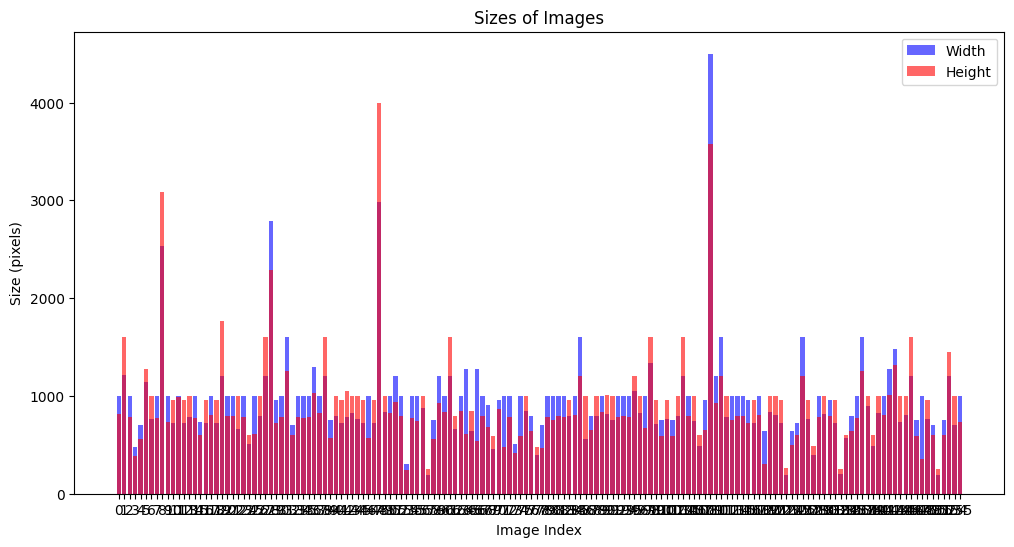